<center>
<h1>Python Application Building</h1>
<img src="http://i.imgur.com/91PUPZA.png" width=20%>
</center>

<center>
AY 250, Spring 2013, Fall 2016; Josh Bloom
</center>

In [ ]:
!pip install simplejson --target=/tmp/

In [ ]:
!ls /tmp/simple*

`...dist-info` directory is part of the "standard infrastructure to manage project distributions installed on a system, so all tools that are installing or removing projects are interoperable." [PEP-376](https://www.python.org/dev/peps/pep-0376/#id19)

[Note the .whl extension...see ["Wheel vs EGG"](https://packaging.python.org/wheel_egg/) and [Wheel info](https://wheel.readthedocs.io/en/latest/)]

Now, you can have Python know about your special installation directory by modifying your `PYTHONPATH` environment variable in your `.bashrc`, `.cshrc`, or `.tcshrc` file:
```bash
#BASH Style: 
export PYTHONPATH=/tmp/simplejson:$PYTHONPATH
#CSH Style:
setenv PYTHONPATH /path/to/my_choice:$PYTHONPATH
```

# Getting and Installing Packages with `setup.py` #

Sometimes `conda` and `pip` cannot find a codebase you're trying to install. In this case you'll need to do it yourself using a tarball and a `setup.py` file. This is the most straightforward way to get packages: download them from the developer’s website and hope that they’ve followed the standard conventions.

There is a standard Python package distribution scheme using `distutils2` and `setup.py` files...more on that later.

Basic workflow of installing a package with `setup.py`:
```bash
$ cd [folder with package and setup.py file]
$ sudo python setup.py install
   # [ progress report ... ]
$ Finished processing dependencies for [package]
   # [if you want more info, there are several options to modify]
$ python setup.py --help install
```

To do a custom installation directory (if you dont have sudo, e.g.):
```bash
# {-- on unix --}
$ python setup.py install --home <my_choice>

# {-- on windows --}
$ python setup.py install --prefix “my_choice”
```

# Managing Packages - `virtualenv`/`conda` environments #

* Open Source software is constantly changing - how do you protect working code against future updates?
* Or, what if there is a beta release of a package you want to try, but you don’t want to fully commit yet?
* `virtualenv` and `conda -n` creates a local, self-contained, and totally separate python installation.
* Use it to create a local Python ecosystem, separate from your computer’s main system, so that you can do what you want in one without affecting the other.

# `virtualenv` #

installing:

In [ ]:
!pip install --upgrade virtualenv

Creating a new environment:

[![asciicast](https://asciinema.org/a/cxhbq03rtd39ez8sy5scwqk1w.png)](https://asciinema.org/a/cxhbq03rtd39ez8sy5scwqk1w)

(https://asciinema.org/)

During a shell session, you can source this environment so that it runs as the default:

```bash
$ source LocalPython/bin/activate
(LocalPython)$
#[ pip and python commands now point to new environment ]
(LocalPython)$ which python
LocalPython/bin/python
```

We can get out of the enviroment:

```bash
 deactivate LocalPython
```
Just delete to remove environment:

```bash
rm -r LocalPython
```


# conda -n #
http://www.continuum.io/blog/conda

In [ ]:
!conda info

In [ ]:
!conda info -e

In [ ]:
!conda search simplejson

In [ ]:
!conda create -n sj381-test simplejson=3.8.1 -y

In [ ]:
!conda info -e

In [ ]:
!ls /Users/jbloom/anaconda/envs/sj381-test/bin

We could make this environment the default if we want to:
```bash
export PATH=~/anaconda/envs/sj381-test/bin:$PATH
```
And if we want to remove that environment:
```bash
conda remove -n sj381-test --all
```

In [ ]:
!conda remove -n sj381-test --all -y

<center><h1> Command Line Parsing</h1></center>

<center>`python myawesomeprogram.py -o option1 -p parameter2 -Q -R`</center>
<p>
 **Goal**: build a command-line 'standalone' codebase in Python, w/ CL options & keywords
 
 **Solution**: `argparse`, which has been built in to Python 2.7 & above (if you don’t have it, you can get it with `pip argparse`)
 
* Allows for  user-friendly command line interfaces, and leaves it up to the code to determine what it was the user wanted.

* Also automatically generates help & usage messages and issues errors when invalid arguments are provided.

(Note on `optparse`: being replaced in favor of `argparse`)

In [ ]:
import argparse

# Setting up a parser #


* First step for `argparse`: create parser object & tell it what arguments to expect. 
* It can then be used to process the command line arguments on runtime
* Parser class: `ArgumentParser`. Takes several arguments to set up the description used in the help text for the program & other global behaviors 
   
 <p>
See  http://www.doughellmann.com/PyMOTW/argparse/
</p>

In [ ]:
%%writefile myfile.py
#!/usr/bin/env python
import argparse
parser = argparse.ArgumentParser(description='Sample Application')
print("hi")

# Defining Arguments & Parsing

* Arguments can trigger different actions, specified by the action argument to `add_argument()`. 
* Several supported actions.
* Once all of the arguments are defined, you can parse the command line by passing a sequence of argument strings to `parse_args()`. 
* By default, arguments are taken from `sys.argv[1:]`, but you can also pass your own list.

In [ ]:
%%file argparse_action.py
import argparse
parser = argparse.ArgumentParser(description='Sample Application')
parser.add_argument('required_arg_1', help='This positional argument is required')
parser.add_argument('required_arg_2', help='This positional argument is also required')
parser.add_argument('-s', action='store', dest='simple_value',
                    help='Store a simple value')
parser.add_argument('-c', action='store_const', dest='constant_value',
                    const='value-to-store',
                    help='Store a constant value')
parser.add_argument('-t', action='store_true', default=False,
                    dest='boolean_switch',
                    help='Set a switch to true')
parser.add_argument('-a', action='append', dest='collection',
                    default=[],
                    help='Add repeated values to a list',
                    )
parser.add_argument('-A', action='append_const', dest='const_collection',
                    const='value-1-to-append',
                    default=[],
                    help='Add different values to list')
parser.add_argument('-B', action='append_const', dest='const_collection',
                    const='value-2-to-append',
                    help='Add different values to list')
parser.add_argument('--version', action='version', version='%(prog)s 1.0')

results = parser.parse_args()
print('required_args    =', results.required_arg_1, results.required_arg_2)
print('simple_value     =', results.simple_value)
print('constant_value   =', results.constant_value)
print('boolean_switch   =', results.boolean_switch)
print('collection       =', results.collection)
print('const_collection =', results.const_collection)

* `store`: Save the value, after optionally converting it to a different type (default)
* `store_const`: Save the value as defined as part of the argument specification, rather than a value that comes from the arguments being parsed
* `store_true`/`store_false`: Save the appropriate boolean value
* `append`: Save the value to a list.  Multiple values are saved if the argument is repeated
* `append_const`: Save a value defined in the argument specification to a list
* `version`: Prints version details about the program and then exits

There's also some other ways of doing arguement parsing that you might want to explore:

 * Click: http://click.pocoo.org/5/quickstart/#basic-concepts


In [ ]:
!pip install click

In [ ]:
%%writefile hello.py
import click
@click.command()
@click.option('--count', default=1, help='number of greetings')
@click.argument('name')
def hello(count, name):
    for x in range(count):
        click.echo('Hello %s!' % name)

if __name__ == '__main__':
    hello()

In [ ]:
!python hello.py --help

In [ ]:
!python hello.py --count=2 Josh

# Breakout! #

* Go to the breakout folder in: `../Breakouts/01_Versioning_Application_Building/`

* Work on the file `breakout1.py`.  Do not move or modify the other files, in the other folders, but you will need to use them.  (You may add files to these directories, if necessary)

* Build up a command line parser which allows the user to specify:
 - how many datapoints to generate
 - whether to plot with a filled in histogram or an outlined one
 - the title of the plot
 - And then have the plot be generated.

* We want to be able to run a command like:

```bash
python breakout1.py -t -n 200 -T "My Awesome Title"
```

In [1]:
cd /Users/jbloom/Classes/python-seminar/Breakouts/01_Versioning_Application_Building/sol

/Users/jbloom/Classes/python-seminar/Breakouts/01_Versioning_Application_Building/sol


In [2]:
ls

breakout1_solution.py  my-virtualenv/         plotting/
datagen/               myenv/                 ttt/


In [3]:
%matplotlib inline

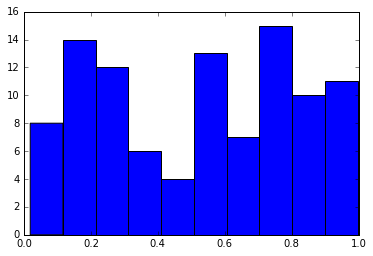

In [4]:
%run breakout1_solution.py -t

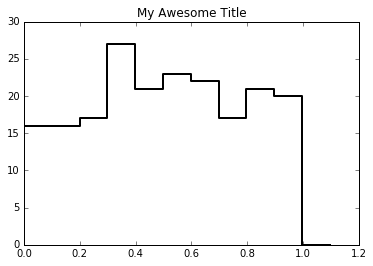

In [5]:
%run breakout1_solution.py -n 200 -T "My Awesome Title"